For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

%matplotlib inline
np.random.seed(42)


## Probability part

In [2]:
# import data
df = pd.read_csv('ab_data.csv')

# show top rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#total rows
df_length = len(df)         
print(df_length)

294478


In [4]:
#no of unique users in dataset
len(df.user_id.unique())


290584

In [5]:
#proportion of users who converted to other page
float(df.converted.sum())/df_length

0.11965919355605512

In [6]:
#rows where control group was give new site and experiment group was give old site by mistake
df_t_not_n = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_not_t_n = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Add lengths
mismatch= len(df_t_not_n) + len(df_not_t_n)

# Create one dataframe from it
mismatch_df = pd.concat([df_t_not_n, df_not_t_n])

mismatch

3893

In [7]:
df.isnull().values.any()#any missing value

False

In [8]:
df2 = df

# Remove mismatched  rows
mismatch_index = mismatch_df.index
df2 = df2.drop(mismatch_index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
# Find unique users
print("Unique users:", len(df2.user_id.unique()))

# Check for not unique users
print("Non-unique users:", len(df2)-len(df2.user_id.unique()))

Unique users: 290584
Non-unique users: 1


In [11]:
# Find duplicated user
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
# Find duplicates under user ids
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
# Drop duplicated user
df2.drop(labels=1899, axis=0, inplace=True)

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
#probability that user gonna convert
df2.converted.mean()

0.11959708724499628

In [16]:
#probability of conversion in cntrol group
df2[df2['group']=='control']['converted'].mean()


0.1203863045004612

In [17]:
#probability of conversion in treatment group
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

In [18]:
(float(len(df2[df2['group']=='treatment']))/len(df2))#probability of getting new page or being treatment group

0.5000619442226688

In particular we can not say one page leads to more conversion as it is almost same for both of pages.

### Part2:  A/B Test

You can state your hypothesis in terms of words or in terms of p(old) ad p(new), which are the converted rates for the old and new pages.
Hypothesis

    h0:p(old)>=p(new)#means people convert from old to new more often
    h1:p(new)>p(old)#peoplse convert from nnew to old more often
    
Now we gonna perform hypothesis testing,for help visit : http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/
Here we will be performing two population hypothesis testing/comparison of two samples from two different populations

In [19]:
n_new, n_old = df2['landing_page'].value_counts()

print("new:", n_new, "\nold:", n_old)

new: 145310 
old: 145274


In [20]:
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()

print("Probability of conversion for new page (p_new):", p_new)

Probability of conversion for new page (p_new): 0.11880806551510564


In [21]:
# Calculate probability of conversion for old page
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

print("Probability of conversion for old page (p_old):", p_old)

Probability of conversion for old page (p_old): 0.1203863045004612


In [22]:
# Take the mean of these two probabilities
p_mean = np.mean([p_new, p_old])

print("Probability of conversion udner null hypothesis (p_mean):", p_mean)

Probability of conversion udner null hypothesis (p_mean): 0.11959718500778342


In [23]:
# Calc. differences in probability of conversion for new and old page (not under H_0)
p_diff = p_new-p_old

print("Difference in probability of conversion for new and old page (not under H_0):", p_diff)

Difference in probability of conversion for new and old page (not under H_0): -0.0015782389853555567


In [24]:
# Simulate conversion rates under null hypothesis
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])

new_page_converted.mean()

0.11979216846741449

In [25]:
pd.Series(new_page_converted).value_counts()

0    127903
1     17407
dtype: int64

In [26]:
(df2[df2['landing_page']=='new_page']['converted']).value_counts()

0    128046
1     17264
Name: converted, dtype: int64

In [27]:
# Simulate conversion rates under null hypothesis
old_page_converted = np.random.choice([1, 0], size=n_old,p=[p_mean, (1-p_mean)])

old_page_converted.mean()

0.11925051970758704

In [28]:
pd.Series(old_page_converted).value_counts()

0    127950
1     17324
dtype: int64

In [29]:
(df2[df2['landing_page']=='old_page']['converted']).value_counts()

0    127785
1     17489
Name: converted, dtype: int64

In [30]:
# Calculate difference in p under the null hypothesis
new_page_converted.mean()-old_page_converted.mean()

0.0005416487598274428

 Simulate 10,000 pnewpnew - poldpold values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in p_diffs.

In [31]:
p_diffs = []

# Re-run simulation 10,000 times
# trange creates an estimate for how long this program will take to run
for i in trange(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)
    

100%|██████████| 10000/10000 [04:08<00:00, 40.24it/s]


`i.` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

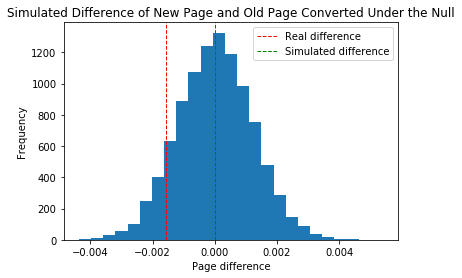

In [32]:
# Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()


In [33]:
p_diff = p_new - p_old

In [34]:
p_diff

-0.0015782389853555567

In [35]:
# Find proportion of p_diffs greater than the actual difference
greater_than_diff = [i for i in p_diffs if i > p_diff]

In [36]:
print("Actual difference:" , p_diff)

p_greater_than_diff = (float(len(greater_than_diff))/len(p_diffs))

print('Proportion greater than actual difference:', p_greater_than_diff)

print('As a percentage: {}%'.format(p_greater_than_diff*100))

Actual difference: -0.0015782389853555567
Proportion greater than actual difference: 0.9065
As a percentage: 90.64999999999999%


we calculate that almost 90% of the population in our simulated sample lies above the real difference which does not only suggest that the new page does not do significantly better than the old page, it might even be worse! 

In [37]:
##Using API to perform hypothesis testing done above
# Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions
# Some of these values were defined ealier in this notebook: n_old and n_new

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old])
print("z-score:", z_score,
     "\np-value:", p_value)

/home/spartan/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310
z-score: -1.3109241984234394 
p-value: 0.18988337448195103


The term significance level (alpha) is used to refer to a pre-chosen probability and the term "P value" is used to indicate a probability that you calculate after a given study.
If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis. It does NOT imply a "meaningful" or "important" difference; that is for you to decide when considering the real-world relevance of your result.

 
 a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.
 
 Given the above definition, it would seem that the differences between the lines shown in the histogram above is -1.31 standard deviations. The p-value is roughly 19.0% which is the probability that this result is due to random chance, this is not enough evidence to reject the null hypothesis and thus we fail to do so.

## Part III - A regression approach



1. In this final part, we will see that the result you acheived in the previous A/B test can also be acheived by performing regression.

a. Since each row is either a conversion or no conversion, what type of regression should we perform in this case?

We can use a logistic regression.

This will likely be the sm module to use.

`b.` The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df3=df2
df3['intercept']=pd.Series(np.zeros(len(df3)),index=df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

In [42]:
# Find indexes that need to be changed for treatment group
index_to_change = df3[df3['group']=='treatment'].index

# Change values
df3.set_value(index=index_to_change, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

# Change datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Move "converted" to RHS
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

/home/spartan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/home/spartan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


 Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns we created above to predict whether or not an individual converts.

In [43]:
# Set up logistic regression
logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate results
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [44]:
result.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-08-07 16:10 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

In [45]:
# Importing data
df_countries = pd.read_csv('countries.csv')

df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
# Creating dummy variables
df_dummy = pd.get_dummies(data=df_countries, columns=['country'])

# Performing join
df4 = df_dummy.merge(df3, on='user_id') # df.join is depricated AFAIK

# Sorting columns
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df4.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [47]:
# Create logit_countries object
logit_countries = sm.Logit(df4['converted'], 
                           df4[['country_UK', 'country_US', 'intercept']])

# Fit
result2 = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [48]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-08-07 17:37 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

In [49]:
# Create logit_countries object
logit_countries2 = sm.Logit(df4['converted'], 
                           df4[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fit
result3 = logit_countries2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [50]:
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-08-07 18:16 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
==================================================================

"""

In [55]:
df4[df4['country_UK']==1]['converted'].mean()

0.12059448568984076

In [56]:
df4[df4['country_US']==1]['converted'].mean()

0.1195468006423762

In [57]:
len(df4[df4['country_UK']==1])

72466

In [58]:
len(df4[df4['country_US']==1])

203619

I would recommend that the e-commerce company spend their money on trying to improve their website before trying again. If anything, perhaps do some reason into why the page performed so poorly.